# Random Forest Performance Benchmarks

In [38]:
import numpy as np
import time

import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display, Image
from sklearn.datasets import load_breast_cancer

# Import our custom utilities
from imp import reload
from utils import irf_jupyter_utils
from utils import irf_utils
reload(irf_jupyter_utils)
reload(irf_utils)

<module 'utils.irf_utils' from '/home/runjing_liu/Documents/iRF/scikit-learn-sandbox/jupyter/utils/irf_utils.py'>

## Load data

In [39]:
raw_data = load_breast_cancer()
print('Dimensions of full dataset (#samples , # features): ', np.shape(raw_data.data))

train_split_propn=0.9
random_state_split=2017

# split into testing and training
X_train, X_test, y_train, y_test = train_test_split(
    raw_data.data, raw_data.target, train_size=train_split_propn,
    random_state=random_state_split)

print('Number of training samples: ', np.shape(X_train)[0])
print('Number of test samples: ', np.shape(X_test)[0])

Dimensions of full dataset (#samples , # features):  (569, 30)
Number of training samples:  512
Number of test samples:  57


## Random Forest benchmarks

In [40]:
n_estimators = 20 # number of trees

t0 = time.time()
rf = RandomForestClassifier(n_estimators=n_estimators, random_state=2018)
rf.fit(X=X_train, y=y_train)
t_rf = time.time() - t0

print('number of trees: ', n_estimators)
print('time to fit rf:', t_rf, '(seconds)')

print('accuracy: ', rf.score(X_test, y_test))

number of trees:  20
time to fit rf: 0.05508875846862793 (seconds)
accuracy:  0.964912280702


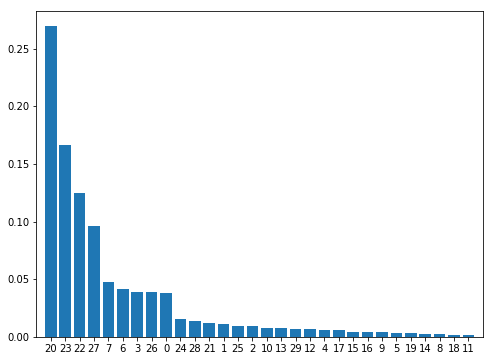

In [41]:
importances = rf.feature_importances_
importances_rank = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 6))
plt.bar(range(X_train.shape[1])
        , importances[importances_rank])
plt.xticks(range(X_train.shape[1]), importances_rank)
plt.xlim([-1, X_train.shape[1]])
plt.show()

## iRF benchmarks

time to fit iRF: 3.5029456615448 (seconds)


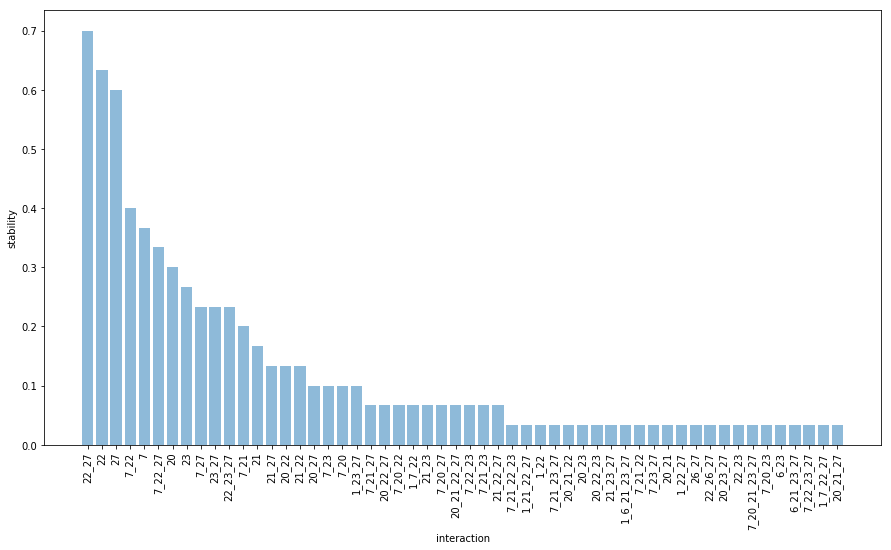

In [17]:
t0 = time.time()

all_rf_weights, all_K_iter_rf_data, \
all_rf_bootstrap_output, all_rit_bootstrap_output, \
stability_score = irf_utils.run_iRF(X_train=X_train,
                                    X_test=X_test,
                                    y_train=y_train,
                                    y_test=y_test,
                                    K=5,
                                    n_estimators=20,
                                    B=30,
                                    random_state_classifier=2018,
                                    propn_n_samples=.2,
                                    bin_class_type=1,
                                    M=20,
                                    max_depth=5,
                                    noisy_split=False,
                                    num_splits=2,
                                    n_estimators_bootstrap=5)
t_iRF = time.time() - t0
print('time to fit iRF:', t_iRF, '(seconds)')

"""print('iterations: ', K)
print('number of bootstrap samples: ', B)
print('proportion of samples for bootstrap: ', propn_n_samples)

print('number of trees in RIT: ', M)
print('depth of RIT: ', max_depth)
print('num_splits: ', num_splits)

print('number of trees on full data: ', n_estimators)
print('number of trees on bootstrap data: ', n_estimators_bootstrap)
"""

# plot stability scores
irf_utils._get_histogram(stability_score, sort = True)